<a href="https://colab.research.google.com/github/ella00100/Kaggle_competition/blob/main/Porto%20Seguro's%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Porto Seguro's Safe Driver Prediction

##Description
- 새 차를 구매하는 열기를 깨뜨리는 것 중 하나는 새로운 보험 요금을 보는 것입니다. 운전을 조심스럽게 해왔다면, 보험료가 많이 올라가는 것은 더욱 고통스럽습니다. 수년간 도로에서 신중하게 운전해왔다면 공정하지 않게 좋은 운전자들이 높은 보험료를 내야만 하는 것 같습니다.

- 브라질 최대 규모의 자동차 및 주택 보험 회사 중 하나인 Porto Seguro는 이것에 완전히 동의합니다. 자동차 보험 회사의 청구 예측에서의 부정확성으로 좋은 운전자들의 보험료가 올라가고, 나쁜 운전자들은 보험료가 낮아집니다.

- 이 대회에서는 운전자가 다음 해 자동차 보험 청구를 제기할 가능성을 예측하는 모델을 구축하도록 도전합니다. Porto Seguro는 20년 이상 기계 학습을 사용해왔지만, Kaggle의 기계 학습 커뮤니티에서 더 강력한 방법을 탐색하고자 합니다. 더 정확한 예측은 그들이 가격을 더욱 세밀하게 조정할 수 있게 하여, 보험 가입이 더 많은 운전자들에게 접근 가능해질 수 있기를 희망합니다.

# Data Preparation & Exploration

## Introduction

1. Visual inspection of your data
2. Defining the metadata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling

### Loading packages

In [ ]:
import pandas as pd #데이터 분석을 위한 라이브러리
import numpy as np  #수학적인 계산을 위한 라이브러리
import matplotlib.pyplot as plt #데이터 시각화를 위한 라이브러리
import seaborn as sns #데이터 시각화를 위한 라이브러리 (matplotlib 기반)

#sklearn : 머신 러닝 모델링을 위한 라이브러리
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100) #100개의 열까지 출력 가능

### Loading data

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c porto-seguro-safe-driver-prediction
!ls

Saving kaggle.json to kaggle (1).json
porto-seguro-safe-driver-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
'kaggle (1).json'			   sample_data		   train.csv
 kaggle.json				   sample_submission.csv
 porto-seguro-safe-driver-prediction.zip   test.csv


In [ ]:
!unzip porto-seguro-safe-driver-prediction.zip

Archive:  porto-seguro-safe-driver-prediction.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                y

replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: train.csv               


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


## Data at first sight

대회의 데이터 설명서에서 다음과 같은 일부 내용이 제공됩니다:

- 비슷한 그룹에 속하는 기능은 기능 이름에 해당 태그가 붙어 있습니다 (예 : ind, reg, car, calc).

- Feature 이름에는 이진 기능을 나타내는 bin 접미사와 범주형 기능을 나타내는 cat이 포함됩니다.

- 이러한 표시가 없는 기능은 연속 또는 순서형입니다.

- -1의 값은 관찰에서 해당 기능이 누락되었음을 나타냅니다.

- 타겟 열은 해당 정책 홀더의 청구가 제기되었는지 여부를 나타냅니다.

- 이것은 우리가 시작하기 위해 중요한 정보입니다. 이것을 확인하기 위해 첫 번째와 마지막 행을 간단히 살펴보겠습니다.

In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


We indeed see the following

- binary 변수
- 범주 값이 정수인 categorical 변수
- 정수 또는 부동 소수 값을 가진 기타 변수
- 결측값을 -1로 나타내는 변수
- target 변수 및 ID 변수

In [ ]:
#shapre : 데이터프레임의 행과 열의 갯수를 출력
train.shape 

(595212, 59)

- 우리는 59개의 변수와 595,212개의 행이 있습니다. 테스트 데이터에도 동일한 수의 변수가 있는지 확인해 봅시다.

- 또한 학습 데이터에 중복된 행이 있는지 확인해 보겠습니다.

In [ ]:
train.drop_duplicates() #중복된 행을 제거
train.shape

(595212, 59)

In [ ]:
test.shape


(892816, 58)

- 테스트 세트에는 하나의 변수가 누락되었지만, 이것은 타겟 변수입니다. 그래서 괜찮습니다.
이제 각 유형의 변수가 얼마나 많은지 조사해 보겠습니다.

- 그래서 나중에 우리는 14개의 범주형 변수에 대해 더미 변수를 만들 수 있습니다. bin 변수는 이미 이진화되어 있으므로 더미화가 필요하지 않습니다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

데이터 유형이 정수 또는 분수라는 것을 알 수 있습니다. 

데이터 집합에 null 값이 없습니다. 

결측값은 -1로 대체되므로 정상입니다.

# Meta data

데이터 관리를 용이하게 하기 위해 변수에 대한 메타 정보를 데이터 프레임에 저장합니다. 이는 분석, 시각화, 모델링 등을 위한 특정 변수를 선택할 때 유용합니다.

Concretely we will store:
- varname: 변수명
- role: input, ID, target
    - role: 변수의 역할
    - target: 종속 변수
    - id: 식별자 변수
    - input: 독립 변수
- level: nominal, interval, ordinal, binary
    - level: 변수의 데이터 유형
    - nominal: 명목형 변수 (카테고리 변수)
    - ordinal: 순서형 변수 (정수형 변수)
    - binary: 이진 변수 (0 또는 1)
    - interval: 간격형 변수 (실수형 변수)
- keep: True or False
    - keep: 변수를 분석에 사용할 것인지 여부
- dtype: int, float, str
    - dtype: 변수의 데이터 타입

In [ ]:
#train 데이터프레임의 각 변수(column)에 대한 메타 정보를 저장
data = []
for f in train.columns: #train데이터의 열을 돌면서 
    # role 정의 : target->종속, id->식별자, 나머지(input-> 독립립)
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
  #level 정의 (이진, 카테고리, 간격, 순서서)
    if 'bin' in f or f == 'target': 
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
  
  #keep 정의
    keep = True
    if f == 'id': #id는 분석에 사용하지 않음 (단순 식별자자)
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype

  #dtype 정의
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)

#meta 데이터 프레임 생성성
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
#index를 varname으로 설정, inplace=True: 기존 데이터 프레임 수정정
meta.set_index('varname', inplace=True)


In [ ]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [ ]:
#드롭하지 않을 변수 중에서 카테고리형형 변수들만을 선택
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [ ]:
#역할(role)과 변수 수준(level)을 기준으로 메타데이터 테이블(meta)에서 변수의 수를 카운트하여 DataFrame으로 출력
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


#Descriptive statistics

우리는 또한 데이터 프레임에 설명 방법을 적용할 수 있습니다. 그러나 범주형 변수와 id 변수에 대한 평균, 표준 등을 계산하는 것은 그다지 의미가 없습니다. 나중에 범주형 변수를 시각적으로 살펴보겠습니다.

메타파일 덕분에 기술 통계량을 계산할 변수를 쉽게 선택할 수 있습니다. 명확한 정보를 얻기 위해 데이터 유형별로 이 작업을 수행합니다.

### Internal variables

In [ ]:
v = meta[(meta.level == 'interval')& (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


- reg 변수
  - ps_reg_03에만 결측값 존재합니다다
  - 변수 간의 범위(최소/최대)가 다흡니다. 스케일링을 적용할 수 잇으나 사용할 분류기에 따라 다릅니다. 

- car 변수
  - ps_car_12와 ps_car_15에 결측값이 존재합니다. 
  - 범위가 다르므로 스케일링을 적용할 수 있습니다. 

- calc 변수
 - 결측값이 없습니다. 
 - 최대치가 0.9인 것으로 보아 비율을 나타내는 것 같습니다. 
 - 세 변수의 분포가 매우 유사합니다. 
 - 전체적으로 구간 변수의 범위가 다소 작은 것으로 보아 데이터를 익명화 하기 위해 일종의 변환이 적용되었을 수 있습니다. 

### Ordinal variables

In [ ]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- 오직 ps_car_11만이 결측값을 갖습니다. 


### Binary variables

In [ ]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 학습 데이터의 사전 확률(A priori)은 3.645%로, 이는 심각하게 불균형한 것으로 나타납니다. 변수들 대부분에서 값이 대부분의 경우에 0인 것으로 보아, 이를 바탕으로 결론을 내릴 수 있습니다.

# Handling imbalanced classes

위에서 언급한 대로, target=1인 레코드의 비율이 target=0인 레코드보다 훨씬 적습니다. 이는 모델의 정확도가 높지만 실제로는 추가적인 가치가 없을 수 있음을 의미합니다. 이 문제를 해결하기 위한 두 가지 가능한 전략은 다음과 같습니다.

- target=1인 레코드를 oversampling 하는 것
- target=0인 레코드를 undersampling 하는 것
- 물론 더 많은 전략이 있으며 MachineLearningMastery.com에서는 이에 대한 좋은 개요를 제공합니다. 우리는 꽤 큰 학습 데이터 세트를 가지고 있으므로, undersampling을 선택할 수 있습니다.

In [ ]:
#target=0인 레코드를 undersampling

desired_apriori = 0.10 #목표로 하는 target=1의 비율을 10%으로 설정 

#train데이터 프레임에서 target=0인 레코드 인덱스를 idx_0, target=1 -> idx_1
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

#각 idx에 해당하는 레코드 수를 nb변수에 할당당
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

#undersampling비율 = (0.9*target=1의 개수)/(target=0의 개수*0.1)
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)

#nb_0 undersampling
undersampled_nb_0 = int(undersampling_rate*nb_0)
print(f'Rate to undersample records with target=0:{undersampling_rate}')
print(f'Number of records with target=0 after undersampling: {undersampled_nb_0}')

#idx_0 중 undersampled_nb_0개를 랜덤하게 추출
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

idx_list = list(undersampled_idx) + list(idx_1)

train = train.loc[idx_list].reset_index(drop=True)




Rate to undersample records with target=0:0.34043569687437886
Number of records with target=0 after undersampling: 195246


# Data Quality Checks

### Checking missing values

In [ ]:
#결측치 조사사
vars_with_missing = []

for f in train.columns: #각 열을 돌면서 
  missings = train[train[f] == -1][f].count()  #결측치의 개수 count
  if missings > 0: #만약 해당 변수수에 결측치가 있다면 
    vars_with_missing.append(f) #vars_with_missing에 변수 추가가
    missings_perc = missings/train.shape[0] #결측치 비율 조사 
    print(f"Variable {f} has {missings} records ({missings_perc:.2%}) with missing values")

print(f'In total, there are {len(vars_with_missing)} variables with missing values')

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


- ps_car_03_cat 및 ps_car_05_cat에는 결측값이 있는 레코드의 비율이 높습니다. 이러한 변수를 제거합니다.

- 결측값이 있는 다른 범주형 변수의 경우 결측값 -1은 그대로 둘 수 있습니다.

- ps_reg_03(연속)에는 모든 레코드의 18%에 대한 결측값이 있습니다. 평균으로 대체합니다.

- ps_car_11(순서)에는 결측값이 있는 레코드가 5개만 있습니다. 최빈값(mode)로 대체합니다.

- ps_car_12(연속)에는 결측값이 있는 레코드가 1개만 있습니다. 평균으로 대체합니다.

- ps_car_14(연속)에는 모든 레코드의 7%에 대한 결측값이 있습니다. 평균으로 대체합니다.

In [ ]:
#결측값이 많은 변수 제거
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[vars_to_drop, 'keep'] = False

#SimpleImputer: 결측치 대체 클래스 
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

#fit_transform(): 데이터 적합, 변환 / ravel(): 다차원배열을 1차원 배열로 평평하게 만듬듬
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables

카디널리티는 변수에 포함된 서로 다른 값의 수를 나타냅니다. 우리는 나중에 범주형 변수에서 더미 변수를 만들 것이기 때문에, 우리는 많은 다른 값을 가진 변수가 있는지 확인해야 합니다. 이러한 변수는 많은 더미 변수를 초래하므로 다르게 처리해야 합니다.

In [ ]:
#카테코리리 변수를 중에서 unique value의 개수를 측정
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
  dist_values = train[f].value_counts().shape[0] #.shape[0] : 행 수 반환
  print(f'Variable {f} has {dist_values} distinct values')

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


ps_car_11_cat만 많은 distinct values을 가지고 있지만, 여전히 합리적입니다.

In [ ]:

def add_noise(series, noise_level):
  '''
  입력 시리즈에 정규분포에서 생성된 랜덤 노이즈를 추가하여 반환
  '''
  return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, tst_series=None, target=None, min_samples_leaf=1,
                  smoothing=1, noise_level=0):
  '''

  '''
  #trn_serise와 target의 길이가 같은지 확인
  assert len(trn_series) == len(target)
  #trin_seires와 tst_seires의 이름이 같은지 확인
  assert trn_series.name == tst_series.name
  #trn_series와 target을 합쳐 새로운 DataFrame 생성
  temp = pd.concat([trn_series, target], axis=1)

  #trn_seires를 기준으로 target의 평균과 개수 계산
  averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])

  smoothing = 1/(1+np.exp(-(averages['count']-min_samples_leaf)/smoothing))
  prior = target.mean()

  #smoothing 계수를 사용하여 각 그룹의 가중 평균을 계산
  averages[target.name] = prior*(1-smoothing) + averages['mean']*smoothing

  #불필요한 칼럼 삭제
  averages.drop(['mean', 'count'], axis=1, inplace=True)


  #trn_series에 대해 target encoding된 값을 저장하는 Series
  ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name),
                           averages.reset_index().rename(
                               columns={'index':target.name, target.name:'average'}),
                           on=trn_series.name,
                           how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
  ft_trn_series.index = trn_series.index

  ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                           averages.reset_index().rename(
                               columns={'index': target.name, target.name: 'average'}),
                           on=tst_series.name,
                           how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

  ft_tst_series.index = tst_series.index
  return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)
  

In [ ]:
#ps_car_11_cat 변수를 인코딩한 뒤, 인코딩된 값으로 변수를 대체
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

#이전 변수 삭제, ps_car_11_cat_te로 대체
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

# Exploratiory Data Visualization

## Categorical variables

<Figure size 640x480 with 0 Axes>

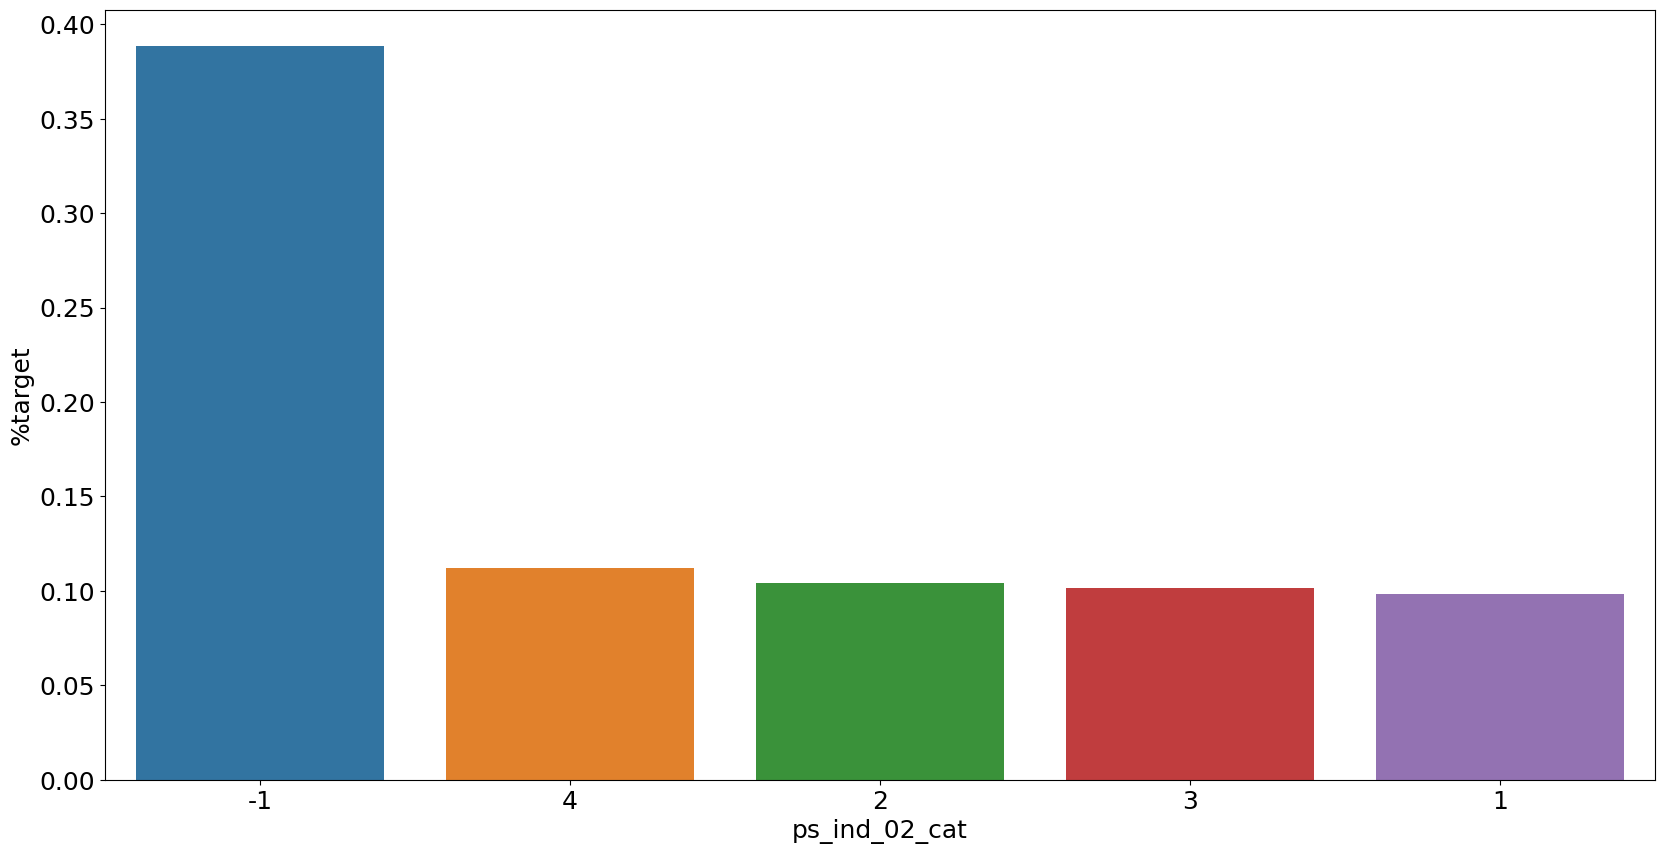

<Figure size 640x480 with 0 Axes>

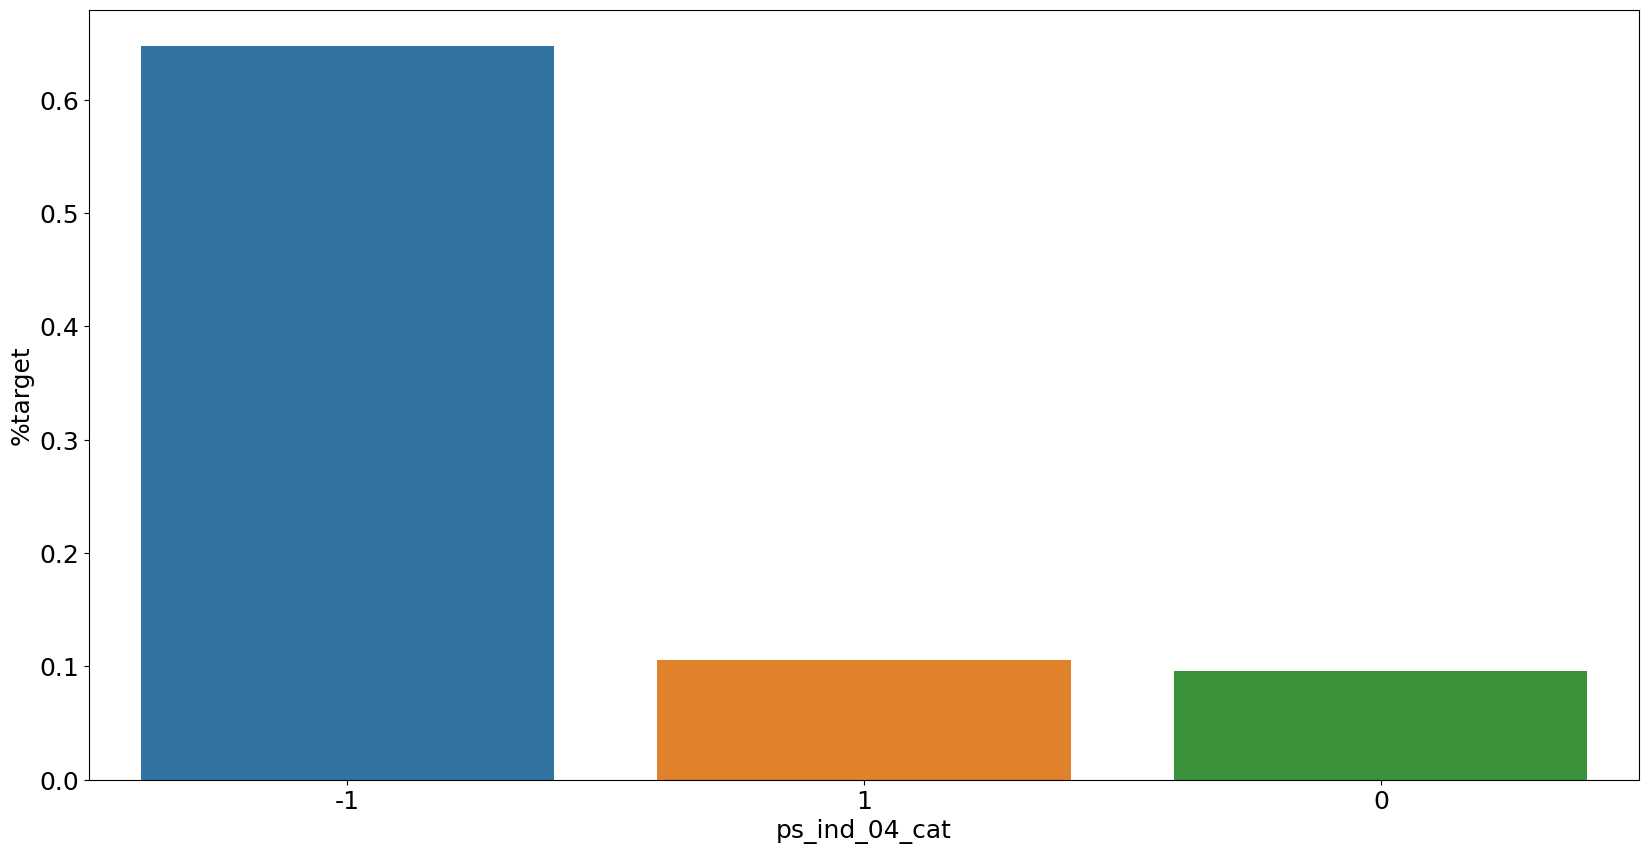

<Figure size 640x480 with 0 Axes>

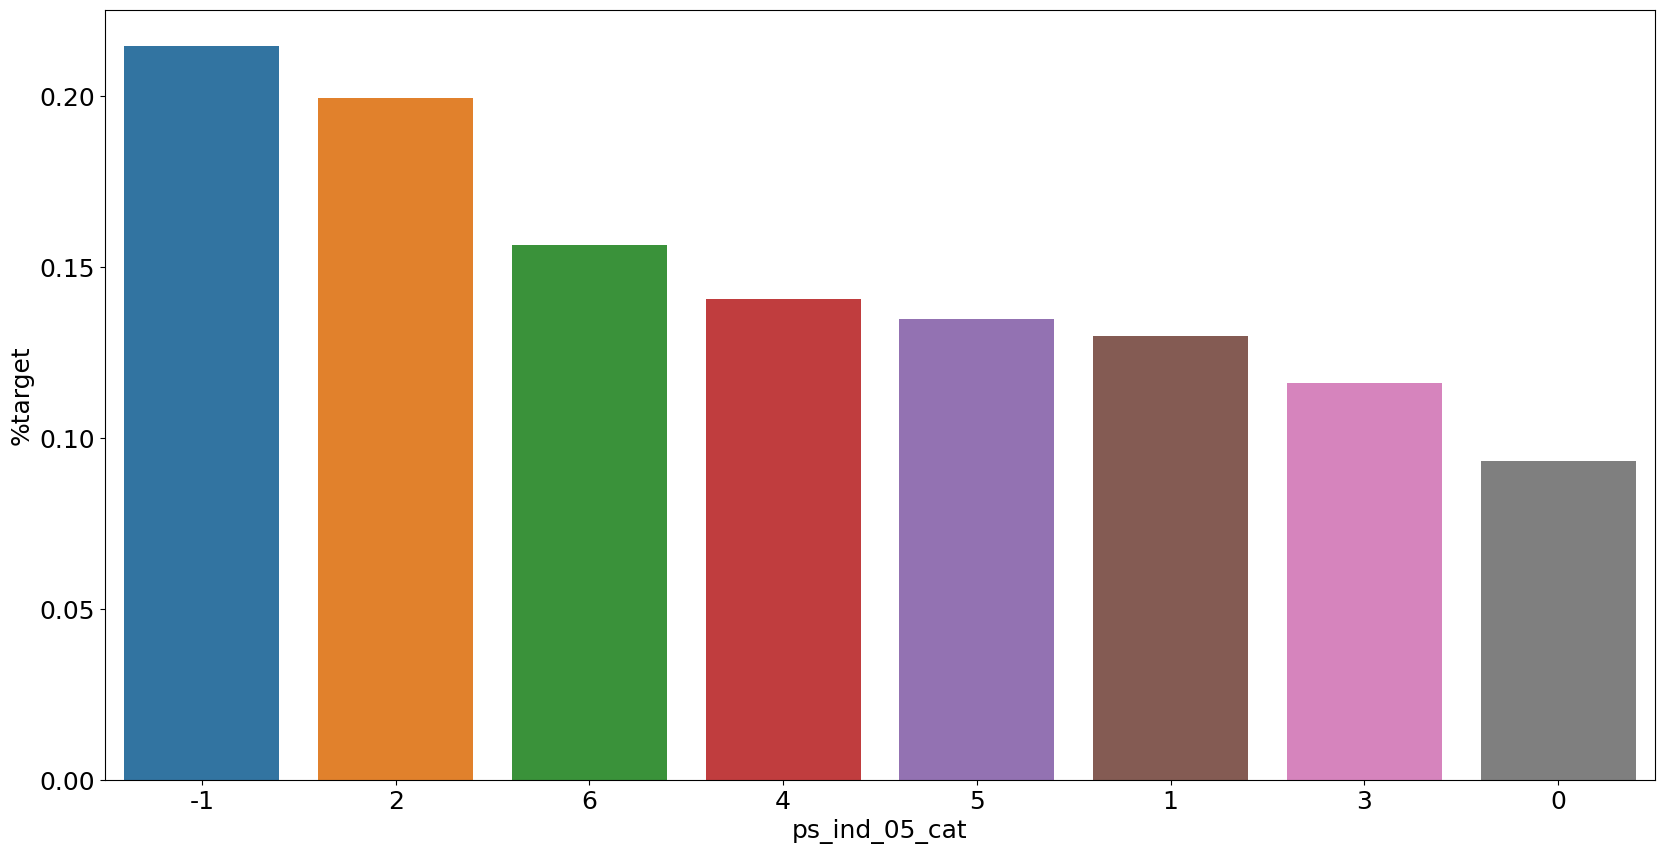

<Figure size 640x480 with 0 Axes>

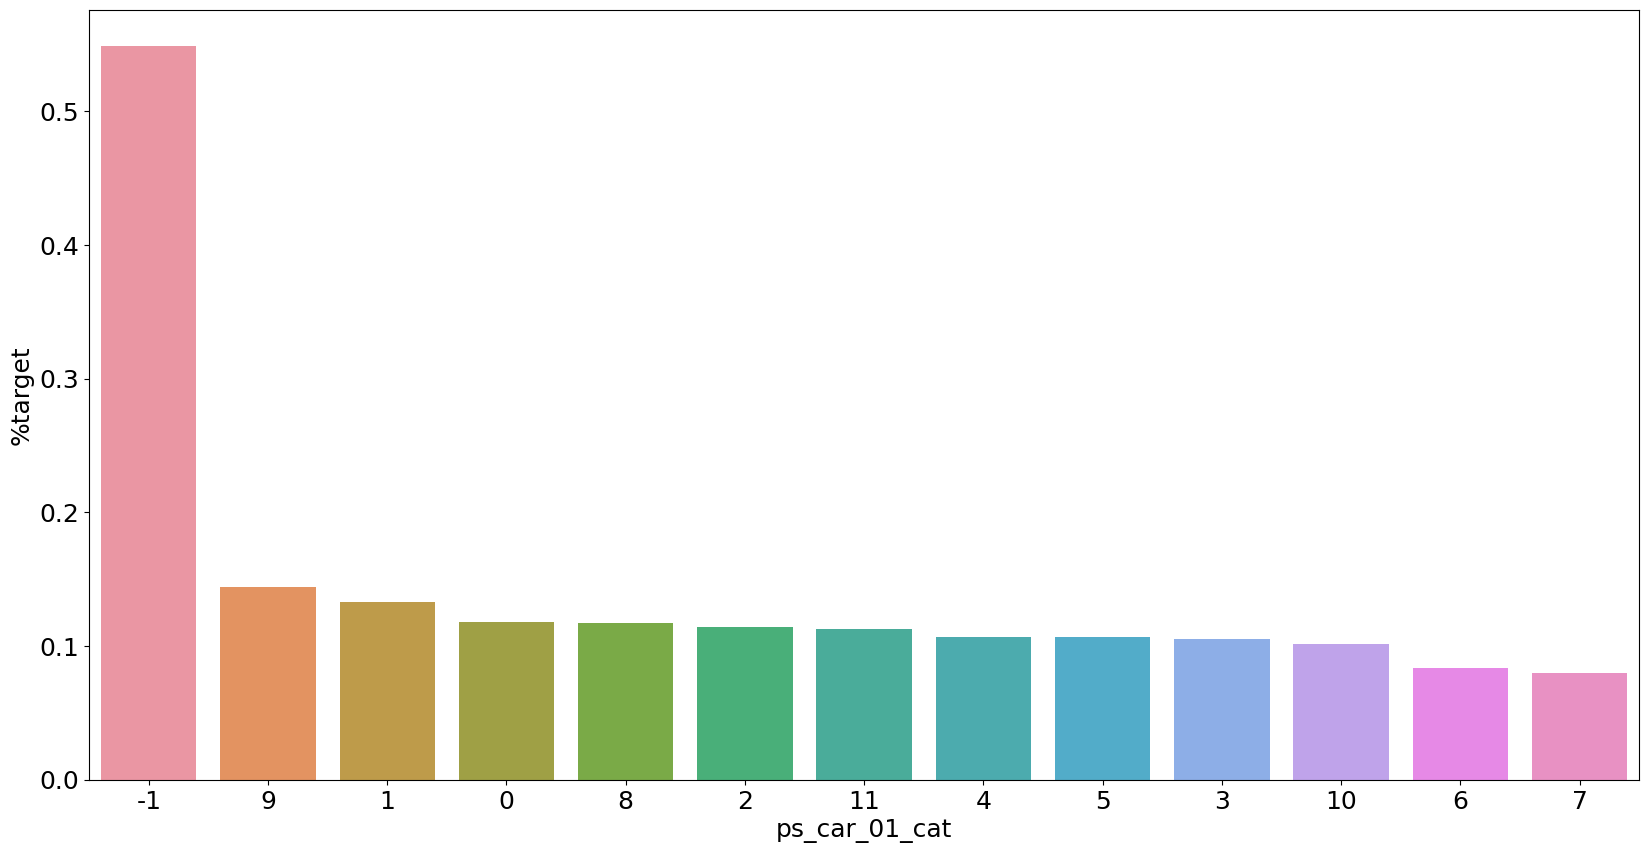

<Figure size 640x480 with 0 Axes>

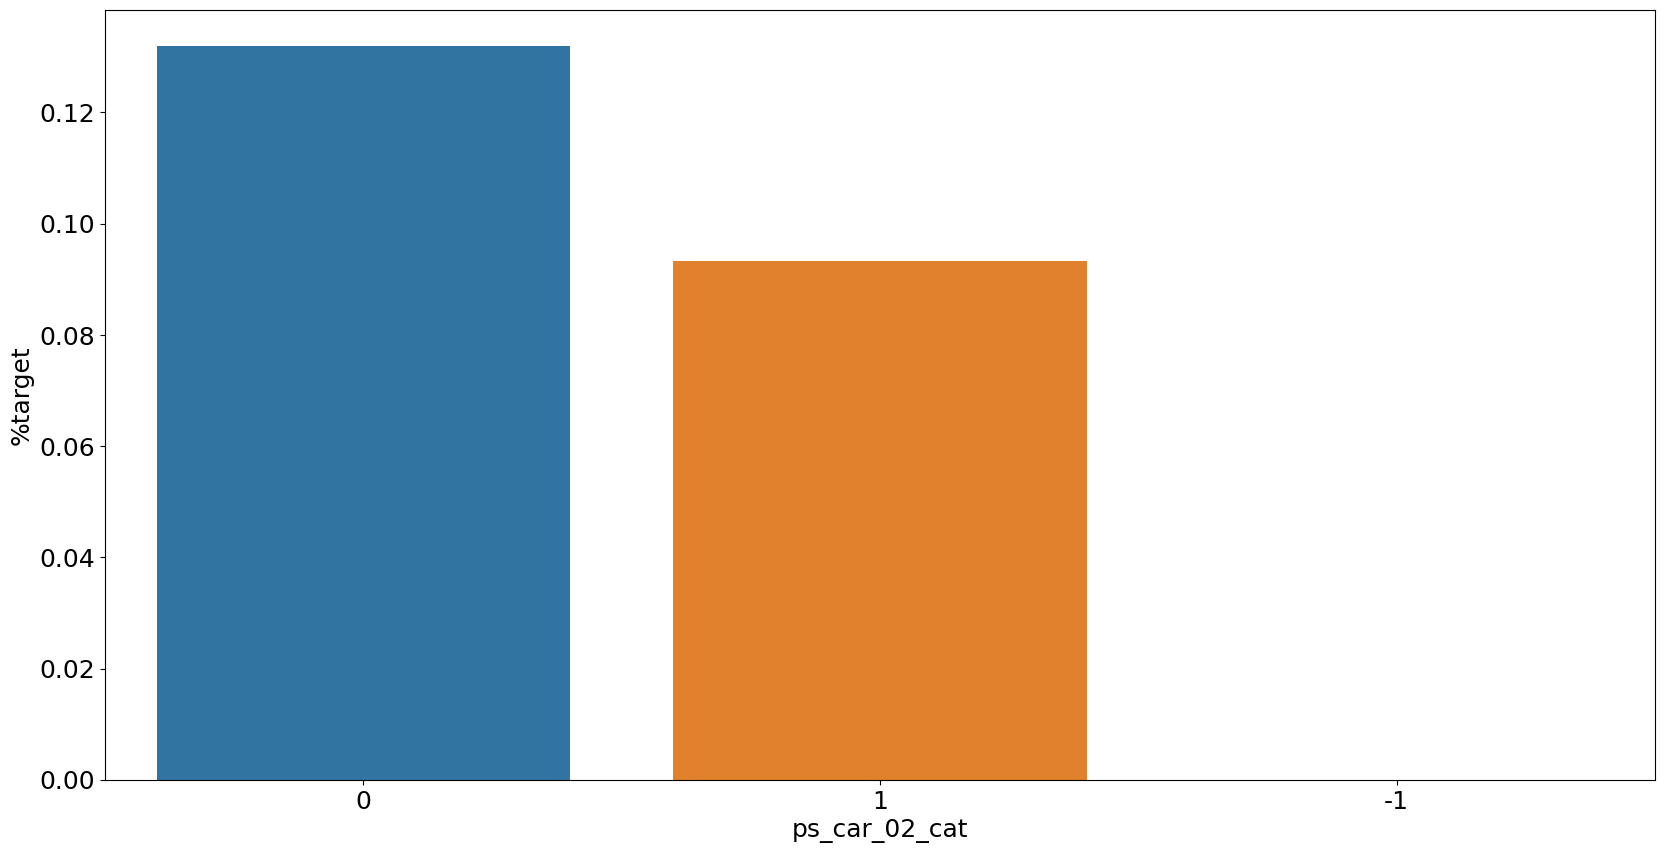

<Figure size 640x480 with 0 Axes>

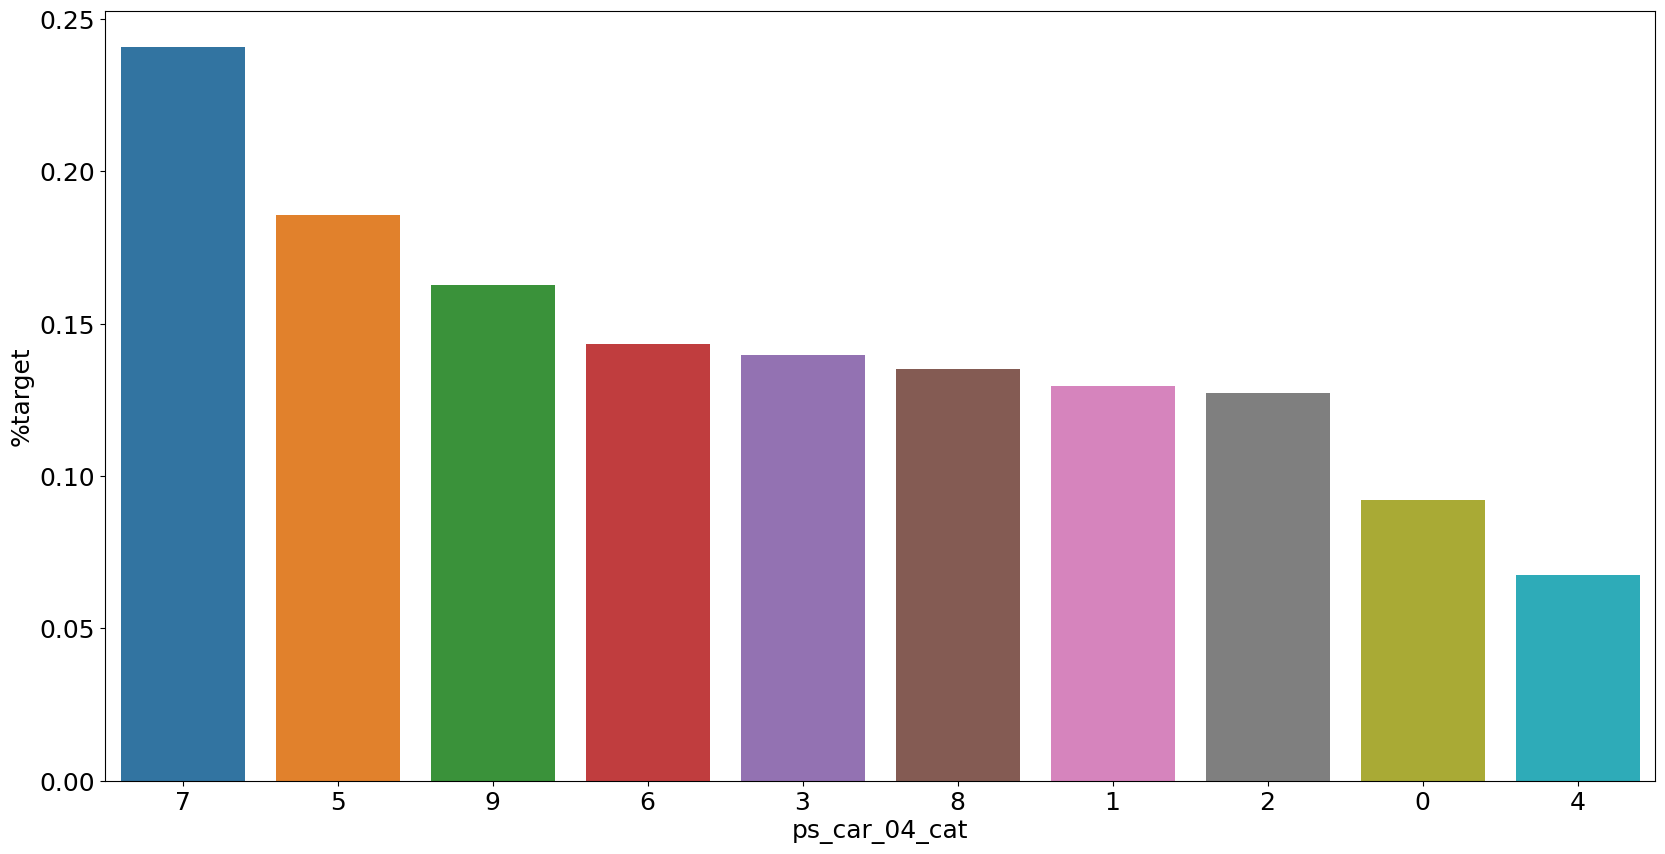

<Figure size 640x480 with 0 Axes>

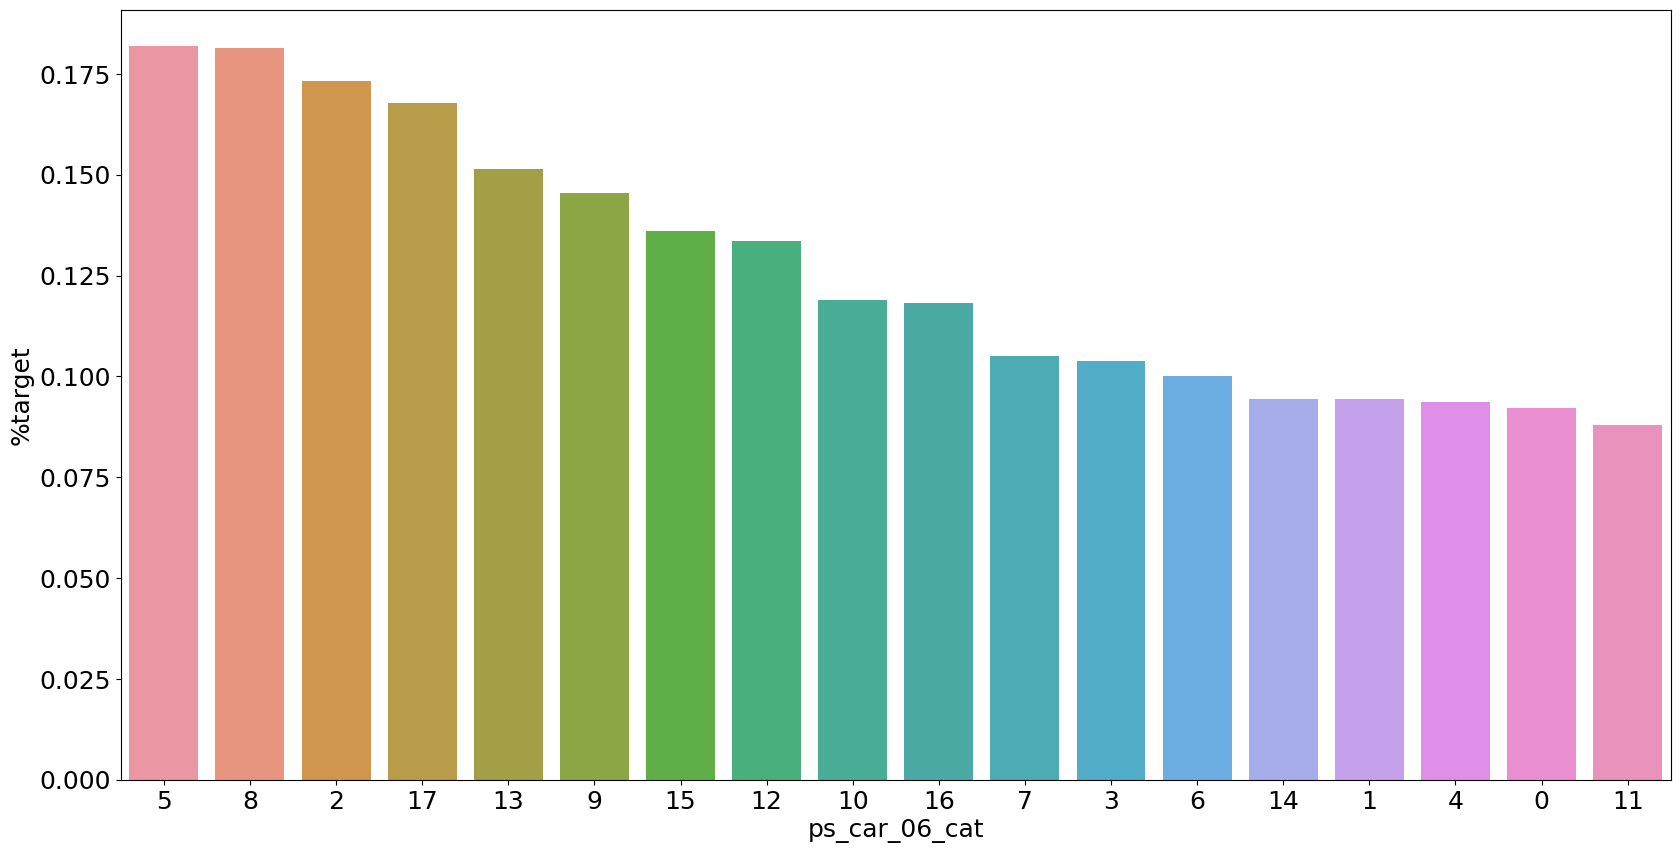

<Figure size 640x480 with 0 Axes>

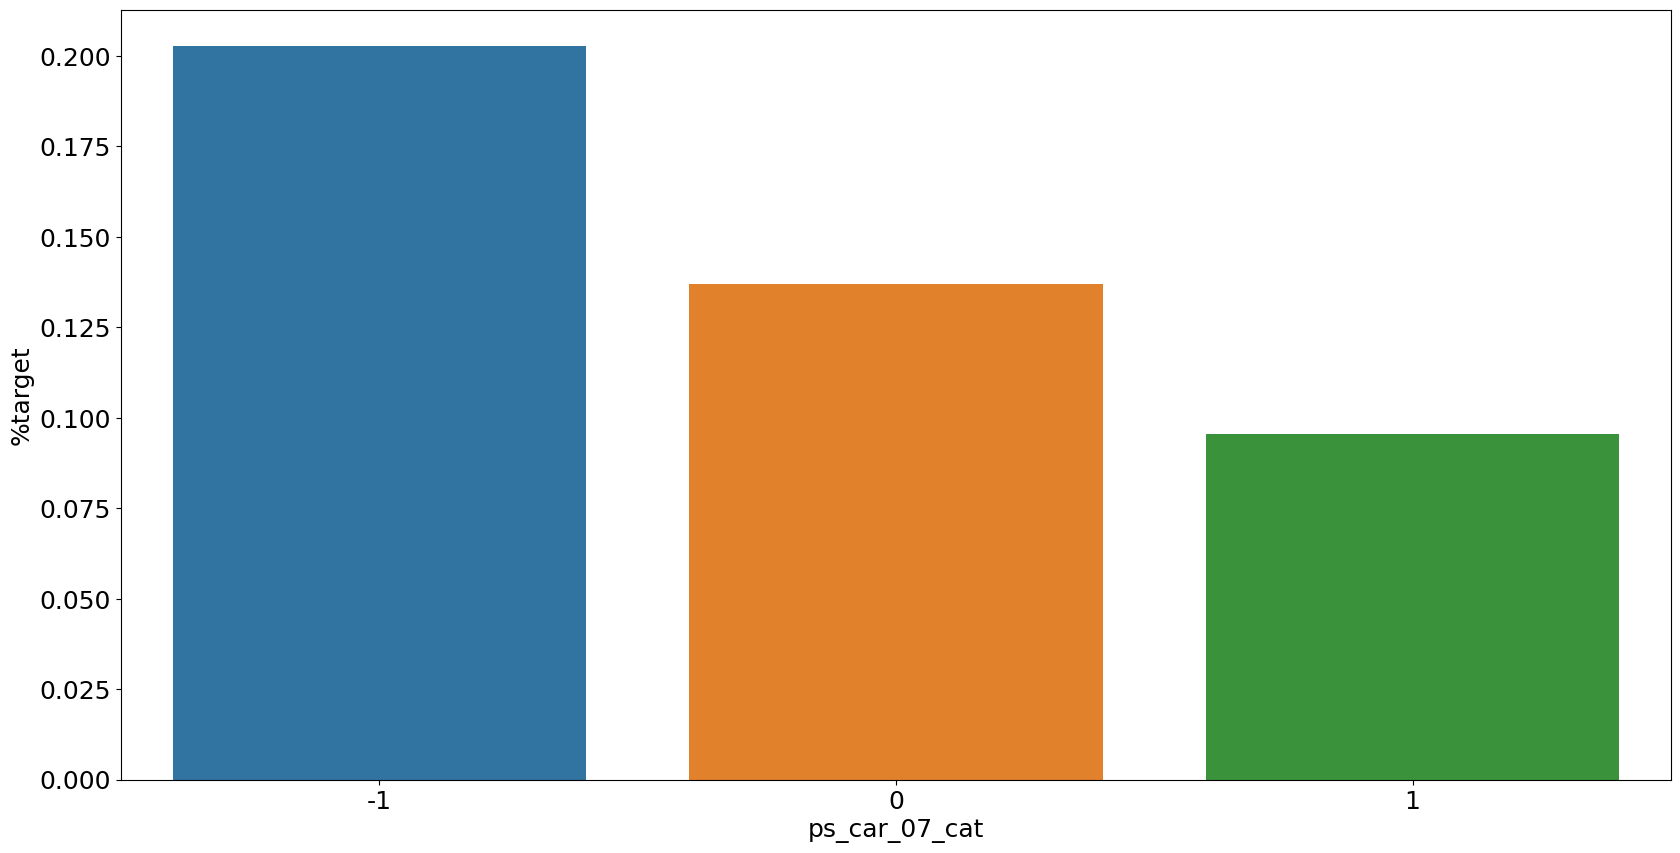

<Figure size 640x480 with 0 Axes>

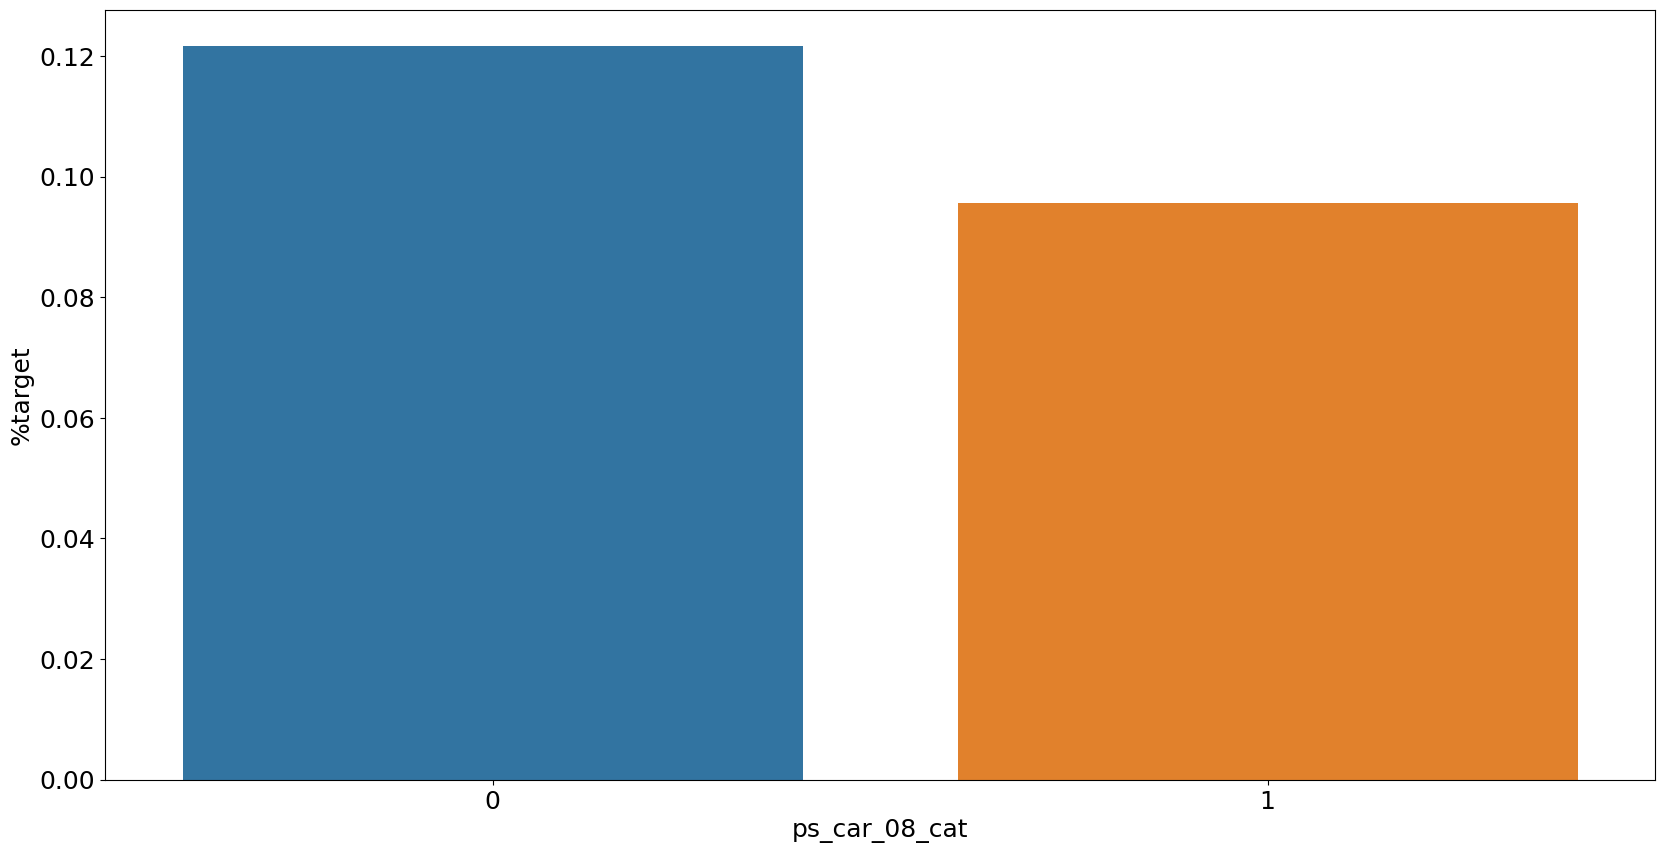

<Figure size 640x480 with 0 Axes>

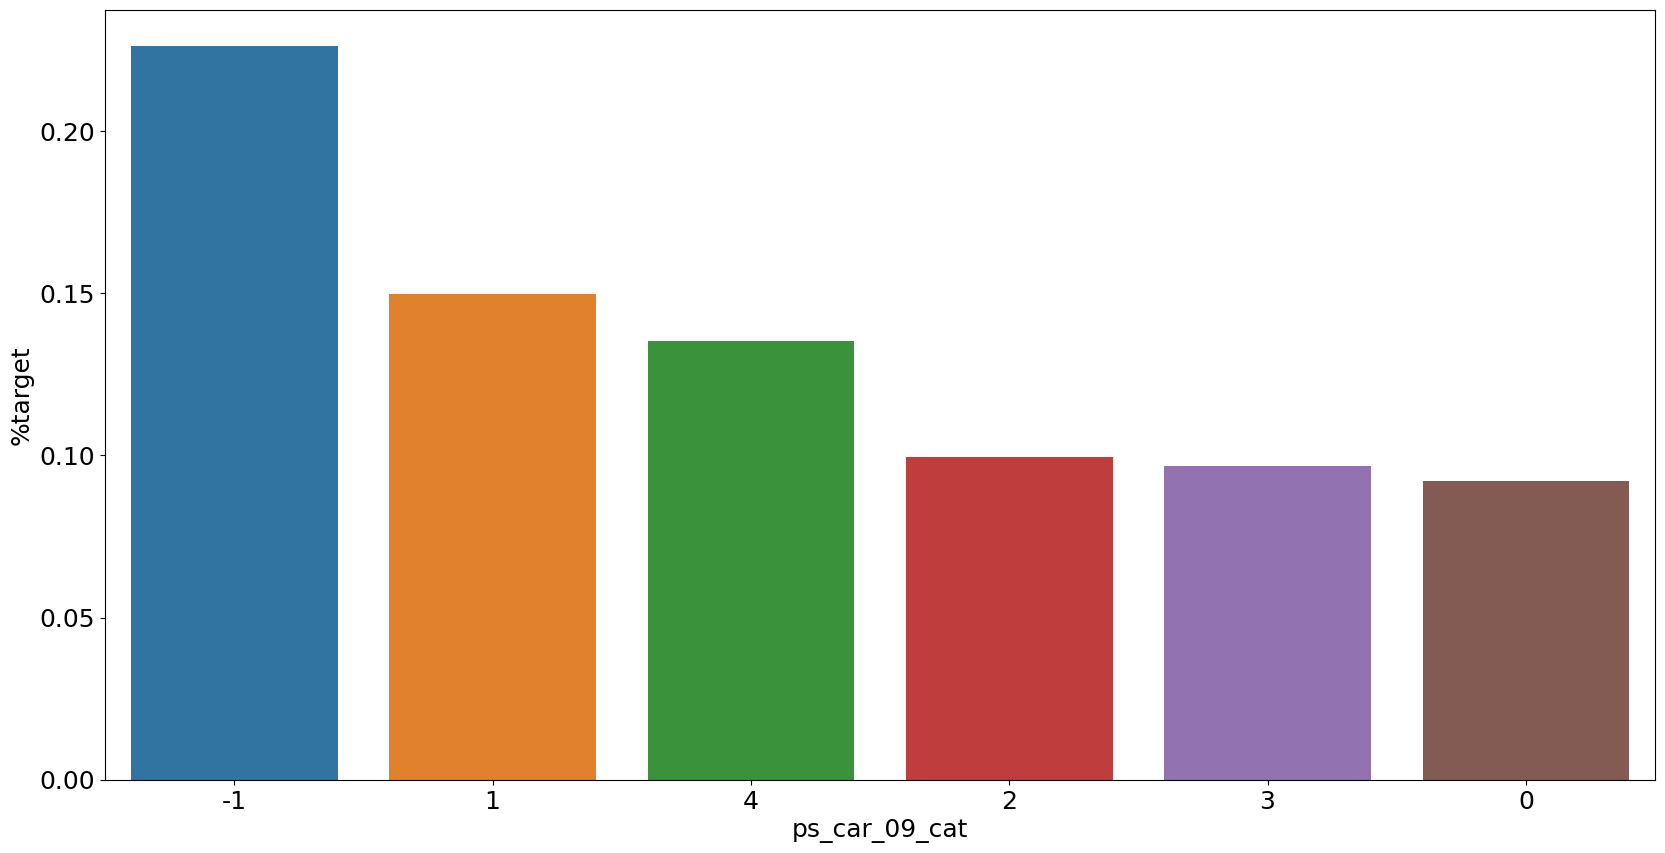

<Figure size 640x480 with 0 Axes>

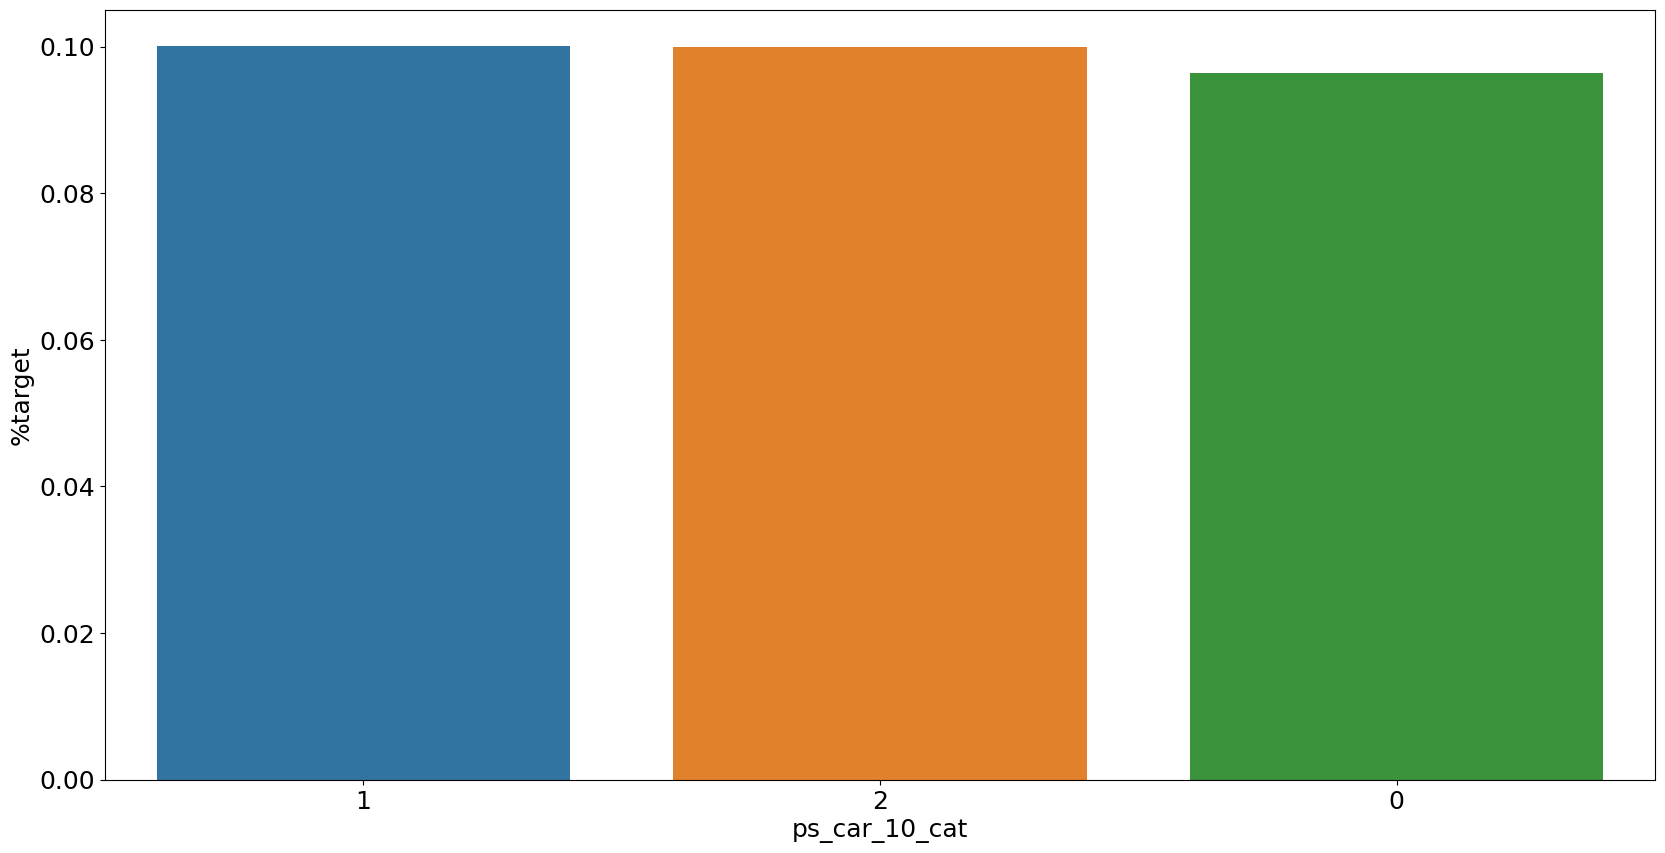

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v: #카테고리 변수들을 탐색하며
  plt.figure()
  fig, ax = plt.subplots(figsize=(20,10))

  #train 데이터프레임에서 f와 target열을 그룹화하여 f별 target의 평균값을 계산
  cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
  #데이터프레임을 target값에 따라 내림차순으로 정렬
  cat_perc.sort_values(by='target', ascending=False, inplace=True)
  
  sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
  plt.ylabel('%target', fontsize=18)
  plt.xlabel(f, fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=18)
  plt.show()

결측치가 있는 변수를 보면, 최빈값으로 대체하는 대신 결측값을 별도의 범주 값으로 유지하는 것이 좋습니다. 결측값이 있는 고객들은 보험 청구를 요청할 확률이 훨씬 높은 경우가 많습니다.



## Interval variables
간격 변수간 상관 관계를 확인하기 위해, 히트맵은 변수간 상관 관계를 시각화하는 좋은 방법입니다. 아래 코드는 Michael Waskom의 예제를 기반으로합니다.

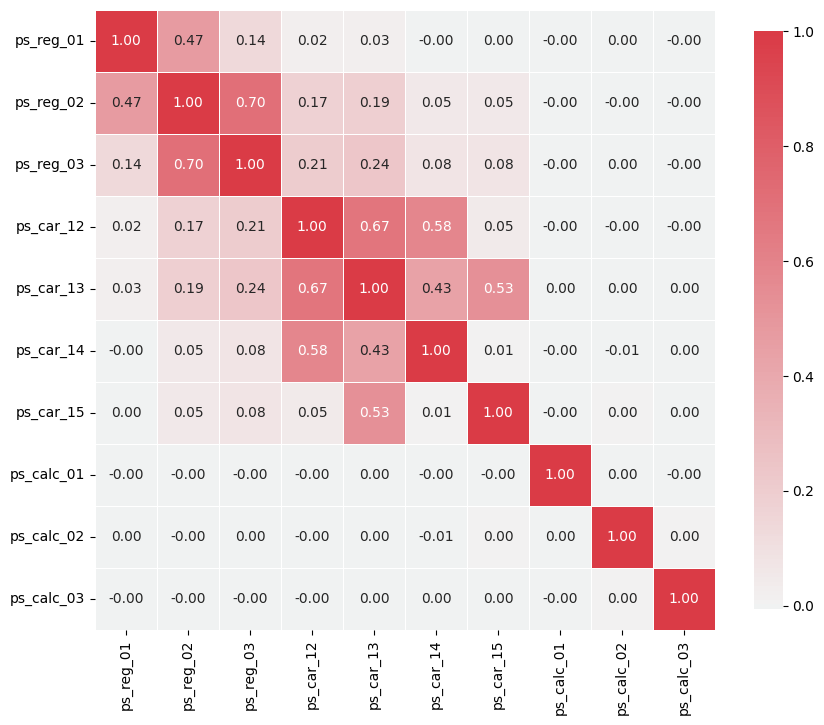

In [ ]:
def corr_heatmap(v):
  '''
  v의 변수 간 상관관계를 heatmap으로 출력하는 함수
  '''
  correlations = train[v].corr()

  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
              square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.75})
  plt.show()

#interval 변수 간의 상관관계 heatmap 출력력
v = meta[(meta.level=='interval') & (meta.keep)].index
corr_heatmap(v)



- 강한 상관관계
  - ps_reg_02 and ps_reg_03 (0.7)
  - ps_car_12 and ps_car13 (0.67)
  - ps_car_12 and ps_car14 (0.58)
  - ps_car_13 and ps_car15 (0.67)

  Seaborn에는 변수 간 (선형) 관계를 시각화하는 유용한 그래프가 있습니다. pairplot을 사용하여 변수 간의 관계를 시각화할 수 있지만 heatmap이 이미 상관 변수의 수가 적다는 것을 보여주었으므로 각 상관 변수를 따로 살펴보겠습니다. 참고: 속도를 높이기 위해 train 데이터의 샘플을 사용합니다.

In [ ]:
#rain 데이터프레임에서 10%의 랜덤 샘플을 추출
s = train.sample(frac=0.1)

### ps_reg_02 and ps_reg_03

회귀선이 보여주듯이 두 변수 간에는 선형적인 관계가 있습니다. hue 매개변수 덕분에 target=0과 target=1의 회귀선이 동일한 것을 볼 수 있습니다.

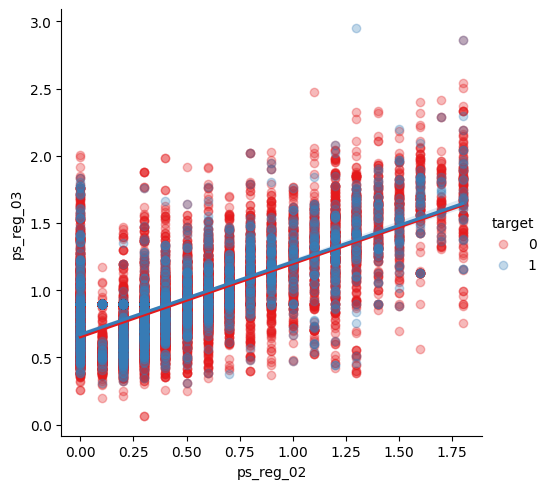

In [ ]:
#lmplot :선형 회귀 모델을 적합시키고, 이를 시각화하여 데이터의 분포와 회귀선을 함께 보여줌줌
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', 
           scatter_kws={'alpha':0.3}) #scatter_kws={'alpha':0.3}: 데이터 포인트의 투명도를 설정
plt.show()

###ps_car_12 and ps_car_13

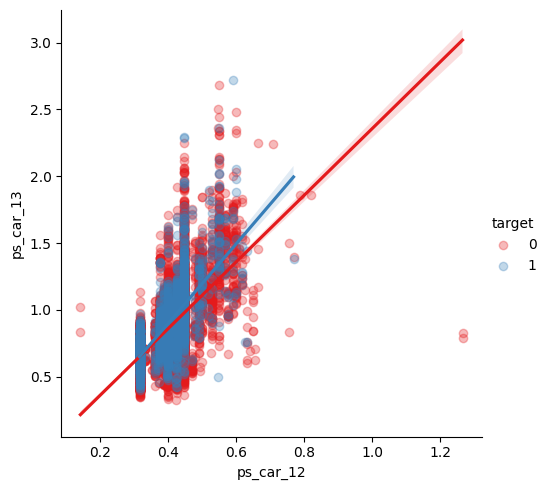

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

###ps_car_13 and ps_car_15

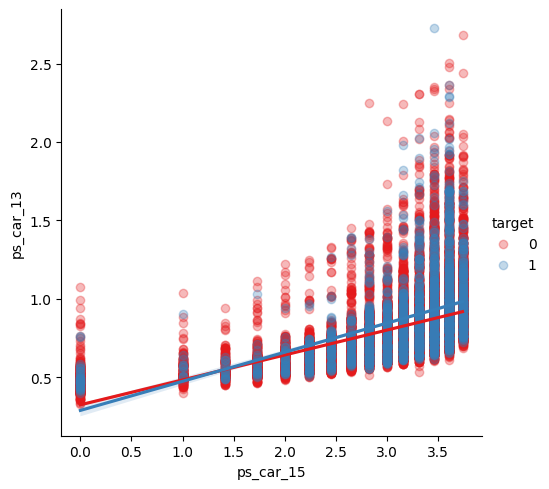

In [ ]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

상관관계가 있는 변수 중 어떤 것을 유지할지 결정하는 방법이 있습니다. 

- 변수를 차원 축소하기 위해 주성분 분석(PCA)을 수행할 수 있습니다. AllState Claims Severity Competition에서는 이 커널을 사용하여 이를 수행했습니다. 
- 그러나 상관 변수의 수가 상대적으로 적기 때문에, 모델이 작업을 수행하도록 놔둘 것입니다.

## Checking the correlations between ordinal vairbles

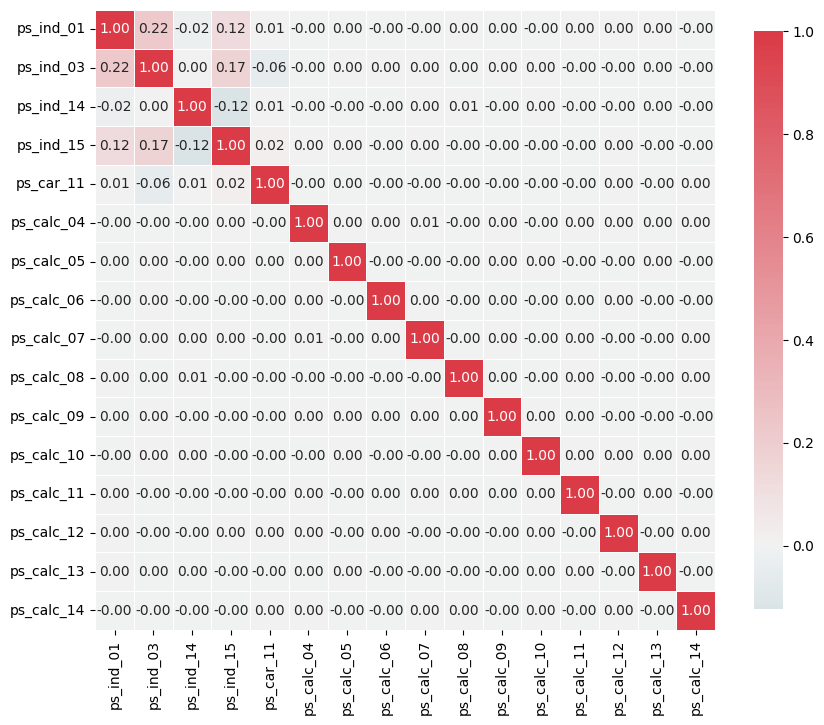

In [ ]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

서열 변수에 대해서는 상관 관계를 볼 수 없습니다. 반면, 대상 값을 기준으로 그룹화 할 때 분포가 어떻게 되는지 살펴볼 수 있습니다.

#Feature engineering

categorical 변수의 값은 순서나 크기를 나타내지 않습니다. 예를 들어, 카테고리 2는 카테고리 1의 두 배가 아닙니다. 따라서 더미 변수를 만들어 이를 처리할 수 있습니다. 우리는 첫 번째 더미 변수를 삭제하며, 이 정보는 원래 변수의 다른 더미 변수에서 유도할 수 있기 때문입니다.

In [ ]:
print(train)

             id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0        353762       0          1              1          1              1   
1        845629       0          5              1          7              1   
2       1449185       0          4              1          3              1   
3        834066       0          6              1          6              0   
4        436189       0          5              1          5              0   
...         ...     ...        ...            ...        ...            ...   
216935  1487473       1          5              1          7              0   
216936  1487566       1          1              1          5              0   
216937  1487716       1          0              1          6              1   
216938  1487748       1          0              2          2              0   
216939  1487866       1          1              2          1              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin

In [ ]:
#명목형 변수를 더미 변수로 변환
v = meta[(meta.level=='nominal') & (meta.keep)].index
print(f'Before dummification we have {train.shape[1]} variables in train')

#train 데이터에서 명목형 변수들을 더미 변수로 변환하고, 기존의 변수들은 삭제
train = pd.get_dummies(train, columns=v, drop_first=True) #get_dummies(): 데이터 이진화하여 새로운 열 생성
print(f'After dummification we have {train.shape[1]} variables in train')

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


In [ ]:
print(train)

             id  target  ps_ind_01  ps_ind_03  ps_ind_06_bin  ps_ind_07_bin  \
0        353762       0          1          1              1              0   
1        845629       0          5          7              1              0   
2       1449185       0          4          3              1              0   
3        834066       0          6          6              1              0   
4        436189       0          5          5              0              0   
...         ...     ...        ...        ...            ...            ...   
216935  1487473       1          5          7              0              0   
216936  1487566       1          1          5              0              0   
216937  1487716       1          0          6              0              1   
216938  1487748       1          0          2              1              0   
216939  1487866       1          1          1              0              0   

        ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin

###Creating interactioon variables

In [ ]:
v = meta[(meta.level=='interval') &(meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names_out(v))
interactions.drop(v, axis=1, inplace=True)
print(f'Before creating interactions we have {train.shape[1]} variables in train')
train = pd.concat([train, interactions], axis=1)
print(f'After creating interactions we have {train.shape[1]} variables in train')

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


이렇게 하면 추가적인 상호작용 변수가 훈련 데이터에 추가됩니다. 
get_feature_names_out 메서드 덕분에 이러한 새 변수에 열 이름을 할당할 수 있습니다.

# Feature Selection

## Removing features with low or zero variance

개인적으로는 분류 알고리즘이 어떤 기능을 유지할지 선택하게 두는 것을 선호합니다.

 그러나 우리가 직접 할 수있는 것이 있습니다. 바로 분산이 없거나 매우 낮은 기능을 제거하는 것입니다. 
 
 Sklearn에는 이를 수행하는 편리한 방법이 있습니다 : VarianceThreshold입니다. 기본적으로 분산이 0 인 기능을 제거합니다. 이는 이전 단계에서 0 분산 변수가 없다는 것을 확인했기 때문에이 대회에는 적용되지 않을 것입니다. 그러나 분산이 1 % 미만인 기능을 제거하면 31 개의 변수가 제거됩니다.

In [ ]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id','target'], axis=1))

f = np.vectorize(lambda x : not x)

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print(f'{len(v)} variables have too low variance.')
print(f'These variables are {list(v)}')

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


- 만약 분산에 기반하여 변수를 선택하면 많은 변수들이 손실될 것입니다. 그러나 우리는 많은 변수가 없기 때문에 분류기가 선택하도록 합니다. 변수가 많은 데이터셋의 경우 이렇게 하면 처리 시간을 줄일 수 있습니다.

- Sklearn은 다른 feature selection method도 제공합니다. 이 중 하나는 SelectFromModel입니다. 이 메소드를 사용하면 다른 classifier가 최상의 feature를 선택하도록 할 수 있으며, 이를 계속 사용할 수 있습니다. 아래에서는 Random Forest를 사용하여 feature 선택을 하겠습니다.


### Selecting features with a Random Forest and SelectFromModel

- 여기서는 Random Forest의 feature importance를 기반으로 feature selection을 할 것입니다. Sklearn의 SelectFromModel을 사용하여 유지할 변수의 수를 지정할 수 있습니다. 수동으로 feature importance의 수준에 대한 임계값을 설정할 수 있습니다. 그러나 우리는 단순히 상위 50%의 최상의 변수를 선택하겠습니다.

In [ ]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_lavels[indices[f]], importances[indices[f]]))

NameError: ignored

SelectFromModel을 사용하면 어떤 미리 학습된 분류기를 사용할지와 특성 중요도의 임계값을 지정할 수 있습니다. get_support 메서드를 사용하여 train 데이터에서 변수의 수를 제한할 수 있습니다.

In [ ]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print(f'Number of features before selection: {X_train}')
n_features = sfm.transform(X_train).shape[1]
print(f'Number of features after selection: {n_features}')
selected_vars = list(feat_labels[sfm.get_support()])


In [ ]:
train = train[selected_vars + ['target']]

# Feature Scaling
앞서 말했듯이, 훈련 데이터에 표준 스케일링을 적용할 수 있습니다. 일부 분류기는 이렇게 하는 경우 성능이 향상될 수 있습니다.

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))